Import necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import Data from CSV

In [2]:
claims = pd.read_csv('Final/fraud_oracle.csv')
claims.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


Exploring the Dataset

In [3]:
claims.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [4]:
claims.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

Renaming the column

In [5]:
claims.rename(columns = {"FraudFound_P": "FraudFound"}, inplace=True)

In [6]:
claims.rename(columns = {"NumberOfSuppliments": "NumberOfSupplements"}, inplace=True)

In [7]:
claims.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSupplements', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

Replacing a character in the column name

In [8]:
claims.columns= claims.columns.str.replace("_", "")

In [9]:
claims.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'DaysPolicyAccident', 'DaysPolicyClaim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSupplements', 'AddressChangeClaim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [10]:
claims.shape

(15420, 33)

In [11]:
claims.isnull().sum()

Month                  0
WeekOfMonth            0
DayOfWeek              0
Make                   0
AccidentArea           0
DayOfWeekClaimed       0
MonthClaimed           0
WeekOfMonthClaimed     0
Sex                    0
MaritalStatus          0
Age                    0
Fault                  0
PolicyType             0
VehicleCategory        0
VehiclePrice           0
FraudFound             0
PolicyNumber           0
RepNumber              0
Deductible             0
DriverRating           0
DaysPolicyAccident     0
DaysPolicyClaim        0
PastNumberOfClaims     0
AgeOfVehicle           0
AgeOfPolicyHolder      0
PoliceReportFiled      0
WitnessPresent         0
AgentType              0
NumberOfSupplements    0
AddressChangeClaim     0
NumberOfCars           0
Year                   0
BasePolicy             0
dtype: int64

In [12]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Month                15420 non-null  object
 1   WeekOfMonth          15420 non-null  int64 
 2   DayOfWeek            15420 non-null  object
 3   Make                 15420 non-null  object
 4   AccidentArea         15420 non-null  object
 5   DayOfWeekClaimed     15420 non-null  object
 6   MonthClaimed         15420 non-null  object
 7   WeekOfMonthClaimed   15420 non-null  int64 
 8   Sex                  15420 non-null  object
 9   MaritalStatus        15420 non-null  object
 10  Age                  15420 non-null  int64 
 11  Fault                15420 non-null  object
 12  PolicyType           15420 non-null  object
 13  VehicleCategory      15420 non-null  object
 14  VehiclePrice         15420 non-null  object
 15  FraudFound           15420 non-null  int64 
 16  Poli

In [13]:
claims["Fault"].describe()

count             15420
unique                2
top       Policy Holder
freq              11230
Name: Fault, dtype: object

In [14]:
claims["PolicyType"].describe()

count                 15420
unique                    9
top       Sedan - Collision
freq                   5584
Name: PolicyType, dtype: object

In [15]:
claims["Fault"].value_counts()

Fault
Policy Holder    11230
Third Party       4190
Name: count, dtype: int64

Most of the fault are done by the policy holders

In [16]:
claims[["Fault","PoliceReportFiled", "FraudFound"]].value_counts()

Fault          PoliceReportFiled  FraudFound
Policy Holder  No                 0             10078
Third Party    No                 0              4007
Policy Holder  No                 1               871
               Yes                0               266
Third Party    Yes                0               146
               No                 1                36
Policy Holder  Yes                1                15
Third Party    Yes                1                 1
Name: count, dtype: int64

7.75% of claims are found to fraud claims when the fault is caused by the Policy Holder and there is no police report filed. 3.48% of claims are found to fraud claims when the fault is caused by the Third Party and there is a police report filed.

In [17]:
claims[["PoliceReportFiled", "FraudFound"]].value_counts()

PoliceReportFiled  FraudFound
No                 0             14085
                   1               907
Yes                0               412
                   1                16
Name: count, dtype: int64

6.04% of claims with no police record is found to fraud whereas 3.73% of claims with police records are found to be false claims. So we can say that most of the fraud claims seems to have no police reports.

<Axes: xlabel='Fault,PoliceReportFiled'>

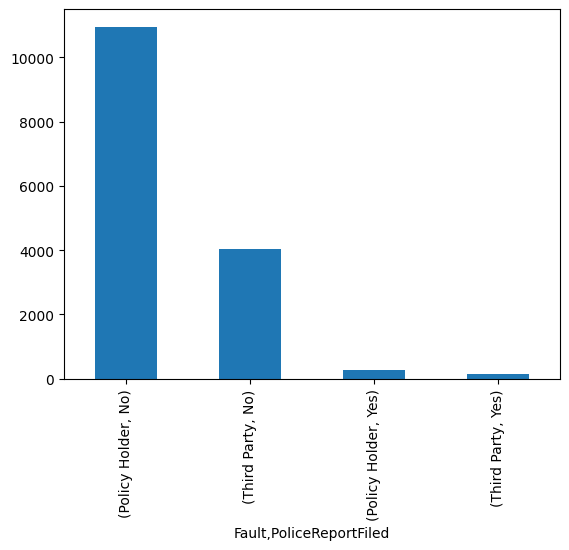

In [18]:
claims[["Fault", "PoliceReportFiled"]].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'NUMBER OF CLAIMS PER MONTH')

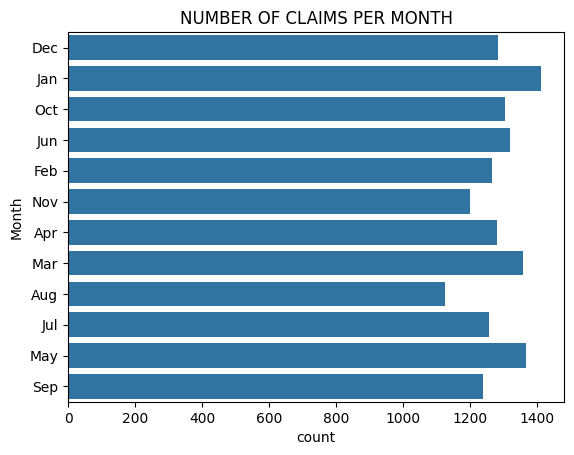

In [19]:
sns.countplot(y= "Month", data = claims)
plt.title("NUMBER OF CLAIMS PER MONTH")

Most number of claims happens in the month of November

Text(0.5, 1.0, 'NUMBER OF CLAIMS BY DAY OF WEEK')

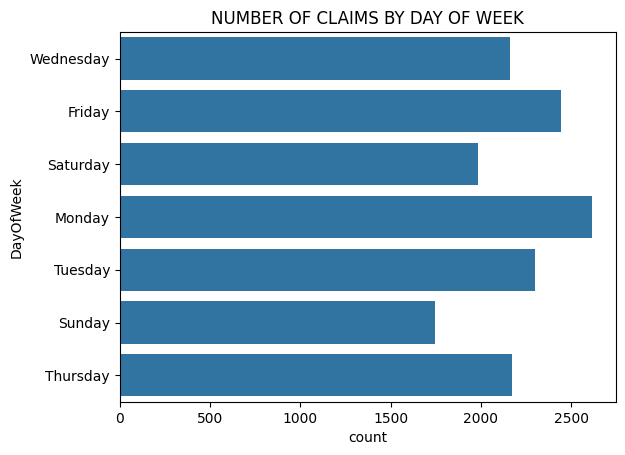

In [20]:
sns.countplot(y= "DayOfWeek", data = claims)
plt.title("NUMBER OF CLAIMS BY DAY OF WEEK")

Highest number of claims are reported in monday

In [21]:
claims['AccidentArea'].unique()

array(['Urban', 'Rural'], dtype=object)

<Axes: xlabel='AccidentArea'>

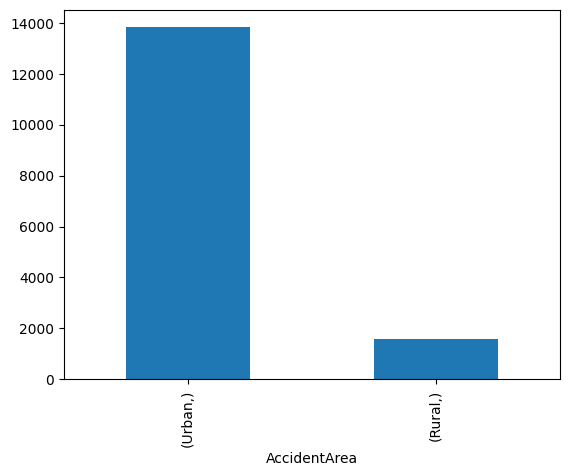

In [22]:
claims[['AccidentArea']].value_counts().plot(kind='bar')

Most of the accidents happened in Urban areas

<Axes: xlabel='AccidentArea,FraudFound'>

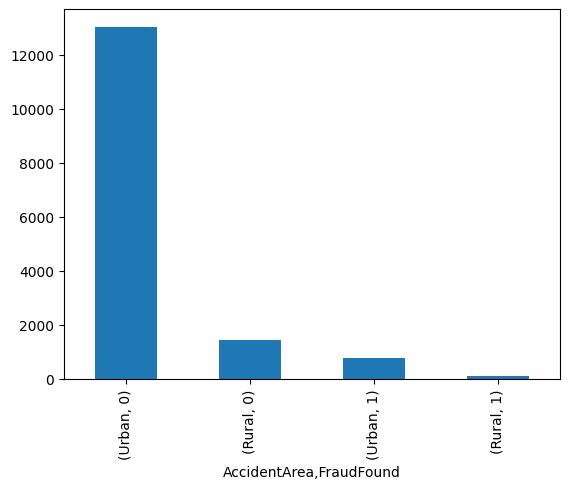

In [23]:
claims[['AccidentArea', 'FraudFound']].value_counts().plot(kind='bar')

5.71% of claims where accident happened in Urban areas found to be fraud claims and 8.32% of claims in which accidents happened in rural areas found to be fraud.

In [24]:
claims[['AccidentArea', 'FraudFound']].value_counts()

AccidentArea  FraudFound
Urban         0             13032
Rural         0              1465
Urban         1               790
Rural         1               133
Name: count, dtype: int64

In [25]:
claims[['DaysPolicyAccident', 'FraudFound']].value_counts()

DaysPolicyAccident  FraudFound
more than 30        0             14342
                    1               905
8 to 15             0                50
15 to 30            0                46
none                0                46
1 to 7              0                13
none                1                 9
8 to 15             1                 5
15 to 30            1                 3
1 to 7              1                 1
Name: count, dtype: int64

In [26]:
claims[['WitnessPresent', 'FraudFound']].value_counts()

WitnessPresent  FraudFound
No              0             14413
                1               920
Yes             0                84
                1                 3
Name: count, dtype: int64

6% of claims with no witness present is found to be fraud whereas 3.44% of claims with witness found to be fraud claims.

In [27]:
claims[['VehicleCategory', 'FraudFound']].value_counts()

VehicleCategory  FraudFound
Sedan            0             8876
Sport            0             5274
Sedan            1              795
Utility          0              347
Sport            1               84
Utility          1               44
Name: count, dtype: int64

8.2% of claims with Sedan, 1.56% of claims with sport and 11.25% of claims with utility vehicle category seems to be fraud.

In [28]:
claims['DriverRating'].value_counts()

DriverRating
1    3944
3    3884
2    3801
4    3791
Name: count, dtype: int64

In [29]:
claims[['DriverRating', 'FraudFound']].value_counts()

DriverRating  FraudFound
1             0             3712
3             0             3642
2             0             3587
4             0             3556
3             1              242
4             1              235
1             1              232
2             1              214
Name: count, dtype: int64

5.88% of claims with 1 driver rating, 5.63% of claims with 2 driver rating, 6.23% of claims with 3 driver rating and 6.28% of claims with 4 driver rating are found to be fraud claims.

In [30]:
claims['NumberOfSupplements'].value_counts()

NumberOfSupplements
none           7047
more than 5    3867
1 to 2         2489
3 to 5         2017
Name: count, dtype: int64

In [31]:
claims[['NumberOfSupplements', 'FraudFound']].value_counts()

NumberOfSupplements  FraudFound
none                 0             6575
more than 5          0             3672
1 to 2               0             2330
3 to 5               0             1920
none                 1              472
more than 5          1              195
1 to 2               1              159
3 to 5               1               97
Name: count, dtype: int64

In [32]:
claims['AgentType'].value_counts()

AgentType
External    15179
Internal      241
Name: count, dtype: int64

Most of the claims are made by Policy Holder with external agent


In [33]:
claims[['AgentType','FraudFound']].value_counts()

AgentType  FraudFound
External   0             14260
           1               919
Internal   0               237
           1                 4
Name: count, dtype: int64

6.05% of claims with External Agent type found to be fraud claims whereas only 1.68% claims with internal agent found to be fraud.

In [34]:
claims[['AgeOfPolicyHolder']].value_counts()

AgeOfPolicyHolder
31 to 35             5593
36 to 40             4043
41 to 50             2828
51 to 65             1392
26 to 30              613
over 65               508
16 to 17              320
21 to 25              108
18 to 20               15
Name: count, dtype: int64

In [35]:
claims[['AgeOfPolicyHolder', 'FraudFound']].value_counts()

AgeOfPolicyHolder  FraudFound
31 to 35           0             5233
36 to 40           0             3806
41 to 50           0             2684
51 to 65           0             1322
26 to 30           0              580
over 65            0              478
31 to 35           1              360
16 to 17           0              289
36 to 40           1              237
41 to 50           1              144
21 to 25           0               92
51 to 65           1               70
26 to 30           1               33
16 to 17           1               31
over 65            1               30
21 to 25           1               16
18 to 20           0               13
                   1                2
Name: count, dtype: int64

6.43% of claims made policy holder with age group 31 to 35, 5.86% with 36-40, 5.09% with 41-50, 5.02% with 51-65, 5.38% with 26-30, 9.68% with 16-17, 5.09% with over 65, 14.81% with 21-25 and 13% of claims with 10-20 age group policy holder are found to be fraud claims.

In [36]:
claims[['AddressChangeClaim', 'FraudFound']].value_counts()

AddressChangeClaim  FraudFound
no change           0             13499
                    1               825
4 to 8 years        0               598
2 to 3 years        0               240
1 year              0               159
2 to 3 years        1                51
4 to 8 years        1                33
1 year              1                11
under 6 months      1                 3
                    0                 1
Name: count, dtype: int64

People with address change claim are the people who hahve made most of the fraud claims. 5.75% of people with no address change claim seems to file fraud claims. 89.3% fraud claims were made by people who have never claimed for address change.

In [37]:
claims[[ 'PastNumberOfClaims', 'FraudFound']].value_counts()

PastNumberOfClaims  FraudFound
2 to 4              0             5191
none                0             4013
1                   0             3351
more than 4         0             1942
none                1              339
2 to 4              1              294
1                   1              222
more than 4         1               68
Name: count, dtype: int64

Most number of fraud claims were made by people who have no past claims. 7.78% of claims made by the people in these category are found to be fault claims. 

In [38]:
claims[['Deductible']].value_counts()

Deductible
400           14838
700             311
500             263
300               8
Name: count, dtype: int64

In [39]:
claims[['AgeOfVehicle', 'FraudFound']].value_counts()

AgeOfVehicle  FraudFound
7 years       0             5482
more than 7   0             3775
6 years       0             3220
5 years       0             1262
new           0              341
7 years       1              325
6 years       1              228
4 years       0              208
more than 7   1              206
3 years       0              139
5 years       1               95
2 years       0               70
new           1               32
4 years       1               21
3 years       1               13
2 years       1                3
Name: count, dtype: int64

In [40]:
claims[['WeekOfMonth', 'FraudFound']].value_counts()

WeekOfMonth  FraudFound
3            0             3425
2            0             3333
4            0             3206
1            0             2987
5            0             1546
2            1              225
3            1              215
1            1              200
4            1              192
5            1               91
Name: count, dtype: int64

In [41]:
claims['Make'].value_counts()

Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64

In [42]:
claims['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

In [43]:
claims['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

In [44]:
claims.DayOfWeekClaimed = claims.DayOfWeekClaimed.apply(lambda x:x.replace('0', 'Sunday'))
claims.MonthClaimed = claims.MonthClaimed.apply(lambda x:x.replace('0', 'Jan'))

In [45]:
claims['WeekOfMonthClaimed'].value_counts()

WeekOfMonthClaimed
2    3720
3    3583
1    3450
4    3433
5    1234
Name: count, dtype: int64

In [46]:
claims[['Sex','FraudFound']].value_counts()

Sex     FraudFound
Male    0             12182
Female  0              2315
Male    1               818
Female  1               105
Name: count, dtype: int64

In [47]:
claims[['Sex','MaritalStatus','PoliceReportFiled', 'WitnessPresent', 'FraudFound']].value_counts()

Sex     MaritalStatus  PoliceReportFiled  WitnessPresent  FraudFound
Male    Married        No                 No              0             8463
        Single         No                 No              0             3297
Female  Married        No                 No              0             1227
        Single         No                 No              0              952
Male    Married        No                 No              1              566
        Single         No                 No              1              235
        Married        Yes                No              0              214
        Single         Yes                No              0               96
Female  Married        No                 No              1               60
        Divorced       No                 No              0               38
        Single         No                 No              1               38
Male    Divorced       No                 No              0               33
Female 

There are totally 923 fraud claims made by people where 6.29% of claims made by men are found to be fraud claims and 4.33% of claims made by women were found to be fraud claims. 98% of fraud claims have no police report filed and no witness present and the other fraud claims have anyone of them present. 

In [48]:
claims[['MaritalStatus']].value_counts()

MaritalStatus
Married          10625
Single            4684
Divorced            76
Widow               35
Name: count, dtype: int64

In [49]:
claims[['MaritalStatus', 'FraudFound']].value_counts()

MaritalStatus  FraudFound
Married        0             9986
Single         0             4406
Married        1              639
Single         1              278
Divorced       0               73
Widow          0               32
Divorced       1                3
Widow          1                3
Name: count, dtype: int64

6.01% of claims made by married people seems to be fraud, 5.93% of claims made by single people seems to be fraud, 4% of claims made by divorced people seems to be fraud and 8.57% of claims made by widow people seems to be fraud.

In [50]:
claims[['PolicyType', 'FraudFound']].value_counts()

PolicyType            FraudFound
Sedan - Collision     0             5200
Sedan - Liability     0             4951
Sedan - All Perils    0             3676
                      1              411
Sedan - Collision     1              384
Sport - Collision     0              300
Utility - All Perils  0              299
Sport - Collision     1               48
Utility - All Perils  1               41
Sedan - Liability     1               36
Utility - Collision   0               27
Sport - All Perils    0               22
Utility - Liability   0               21
Utility - Collision   1                3
Sport - Liability     0                1
Name: count, dtype: int64

Most number of false claims were of policy type Sedan - All Perils which has 10.05% of false claims in it's category. 

In [51]:
claims[['VehiclePrice', 'FraudFound']].value_counts()

VehiclePrice     FraudFound
20000 to 29000   0             7658
30000 to 39000   0             3358
more than 69000  0             1975
less than 20000  0              993
40000 to 59000   0              430
20000 to 29000   1              421
more than 69000  1              189
30000 to 39000   1              175
less than 20000  1              103
60000 to 69000   0               83
40000 to 59000   1               31
60000 to 69000   1                4
Name: count, dtype: int64

In [52]:
claims['RepNumber'].value_counts()

RepNumber
7     1069
9      999
1      987
5      987
10     986
12     977
15     977
16     967
2      956
3      949
11     948
6      942
14     941
8      931
4      912
13     892
Name: count, dtype: int64

<Axes: ylabel='count'>

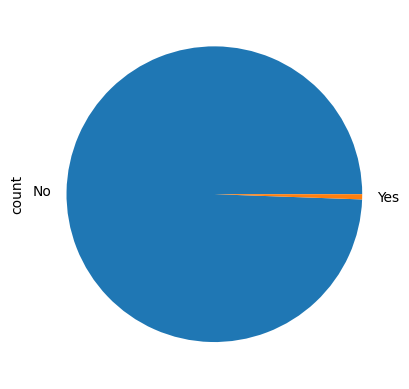

In [53]:
claims["WitnessPresent"].value_counts().plot(kind='pie')

In [54]:
claims[['BasePolicy', 'FraudFound']].value_counts()

BasePolicy  FraudFound
Collision   0             5527
Liability   0             4973
All Perils  0             3997
            1              452
Collision   1              435
Liability   1               36
Name: count, dtype: int64

In [55]:
claims[['BasePolicy', 'WitnessPresent', 'FraudFound']].value_counts()

BasePolicy  WitnessPresent  FraudFound
Collision   No              0             5484
Liability   No              0             4966
All Perils  No              0             3963
                            1              451
Collision   No              1              433
            Yes             0               43
Liability   No              1               36
All Perils  Yes             0               34
Liability   Yes             0                7
Collision   Yes             1                2
All Perils  Yes             1                1
Name: count, dtype: int64

10.15% of claims made under the base policy all perils, 7.29% of claims made under the base policy collision and only 0.71% of claims made under the base policy liability seeems to be fraud claims. 99.77% of all perils category, 99.54% of collision, 83.72% of liability base policy fraud claims has no witness present.

In [56]:
claims[['PoliceReportFiled', 'WitnessPresent', 'FraudFound']].value_counts()

PoliceReportFiled  WitnessPresent  FraudFound
No                 No              0             14040
                                   1               905
Yes                No              0               373
No                 Yes             0                45
Yes                Yes             0                39
                   No              1                15
No                 Yes             1                 2
Yes                Yes             1                 1
Name: count, dtype: int64

98.04% of false claims has no police report filed and no witness found. 

In [93]:
claims[['AgentType', 'PoliceReportFiled', 'WitnessPresent', 'Fault', 'FraudFound']].value_counts()

AgentType  PoliceReportFiled  WitnessPresent  Fault          FraudFound
External   No                 No              Policy Holder  0             9908
                                              Third Party    0             3909
                                              Policy Holder  1              865
           Yes                No              Policy Holder  0              242
Internal   No                 No              Policy Holder  0              157
External   Yes                No              Third Party    0              120
Internal   No                 No              Third Party    0               66
External   No                 No              Third Party    1               36
                              Yes             Third Party    0               32
           Yes                Yes             Third Party    0               22
                              No              Policy Holder  1               14
                              Yes             Po

Most fraud claims are made by policy holders who have external agent with no police report filed on the accident and no witness found.

Text(0.5, 1.0, 'Vehicle Category Vs Driver Rating')

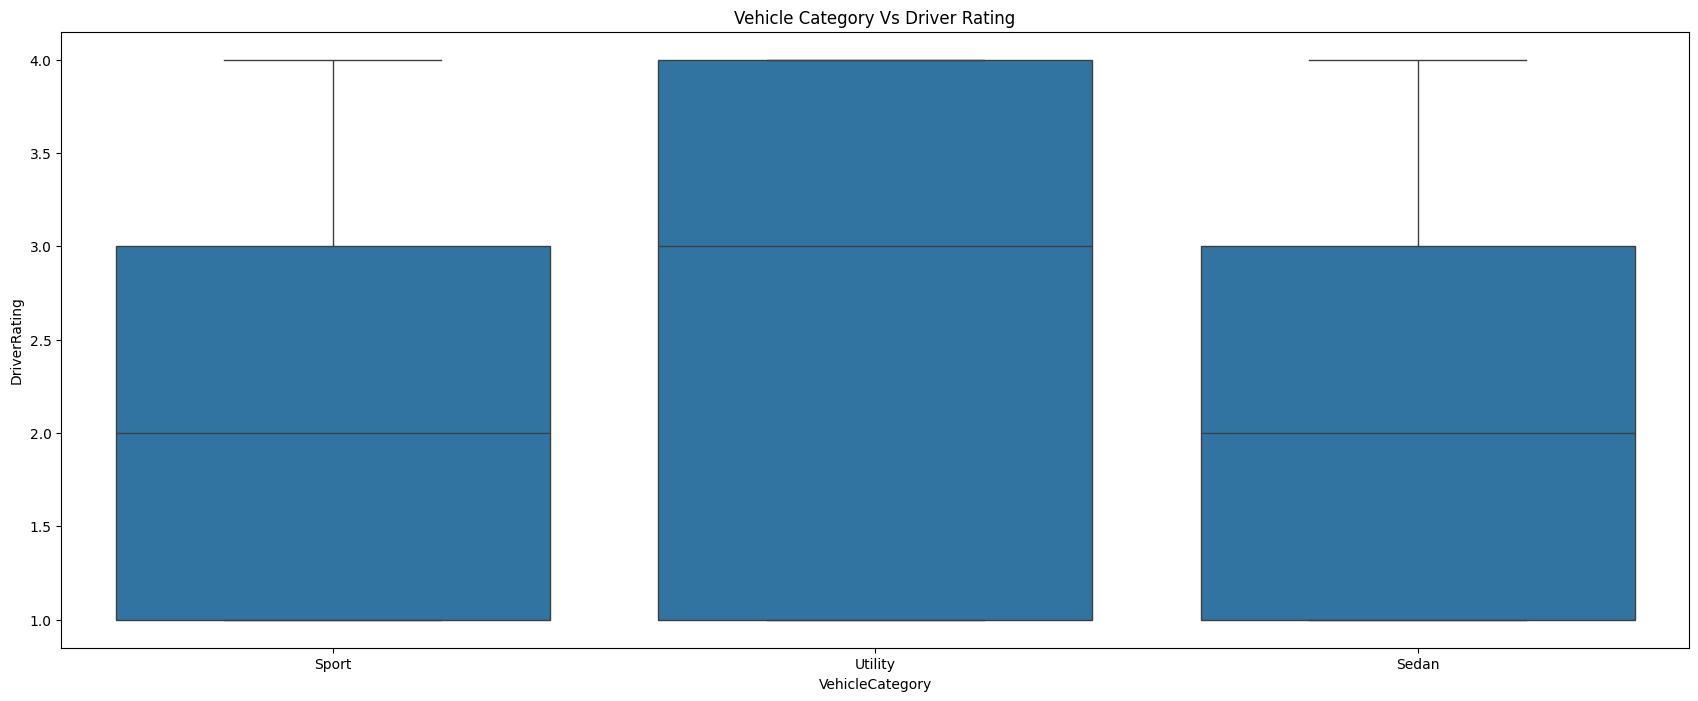

In [57]:
plt.figure(figsize=(21, 8))
sns.boxplot(x= "VehicleCategory", y= "DriverRating", data = claims)
plt.title("Vehicle Category Vs Driver Rating")

<Axes: xlabel='count', ylabel='Fault'>

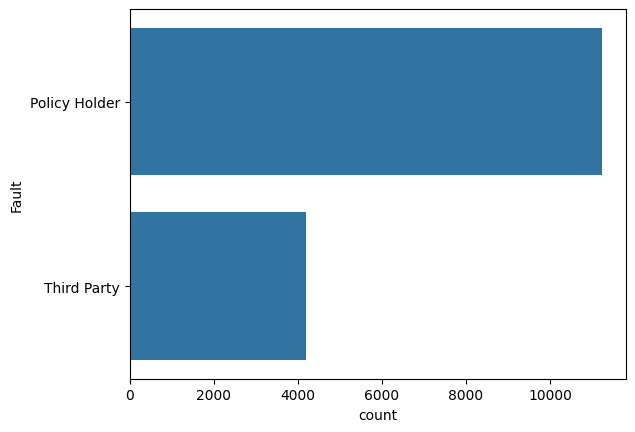

In [58]:
sns.countplot(y= "Fault", data = claims)


In [59]:
Fraud =  claims.groupby(['Fault', 'FraudFound'], as_index = False).agg(FraudCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Count of Fraud by Fault made')

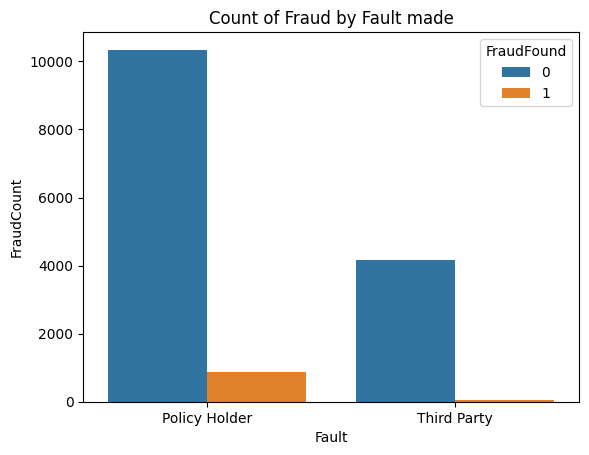

In [60]:
sns.barplot(data= Fraud, x= "Fault", y= "FraudCount", hue = "FraudFound")
plt.title('Count of Fraud by Fault made')

In [61]:
F_claims =  claims.groupby(['PoliceReportFiled', 'FraudFound'], as_index = False).agg(FraudCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Count of Fraud by Police Report Filed')

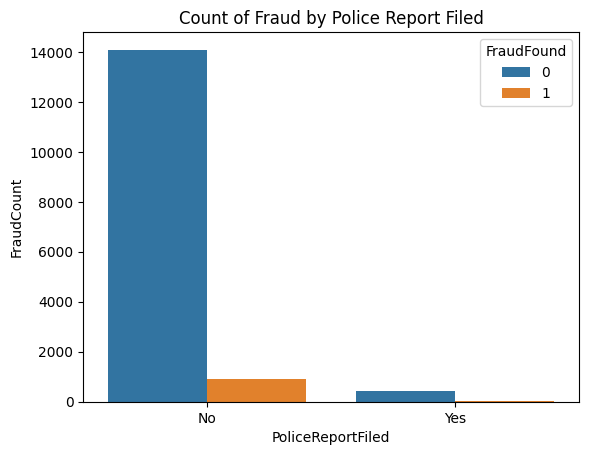

In [62]:
sns.barplot(data= F_claims, x= "PoliceReportFiled", y= "FraudCount", hue = "FraudFound")
plt.title('Count of Fraud by Police Report Filed')

In [63]:
W_found =  claims.groupby(['WitnessPresent', 'FraudFound'], as_index = False).agg(FraudCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Count of Fraud by Witness Present')

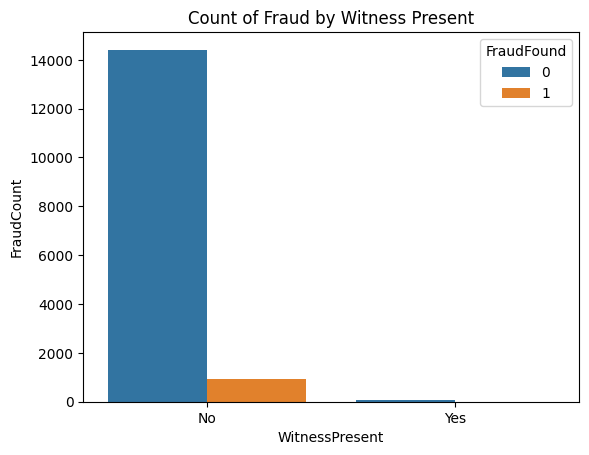

In [64]:
sns.barplot(data= W_found, x= "WitnessPresent", y= "FraudCount", hue = "FraudFound")
plt.title('Count of Fraud by Witness Present')

In [65]:
area =  claims.groupby(['AccidentArea', 'FraudFound'], as_index = False).agg(FraudCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Count of Fraud by Accident Area')

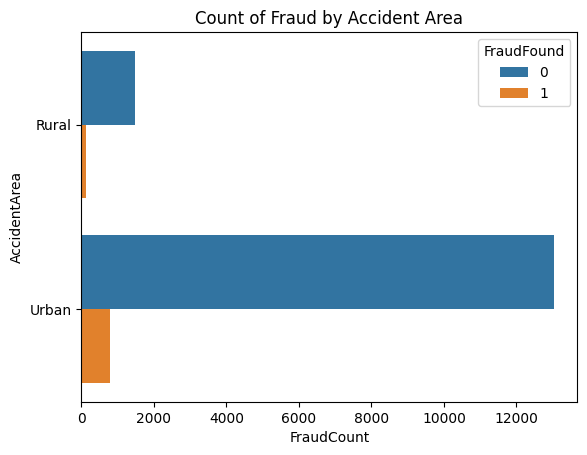

In [66]:
sns.barplot(data= area, y= "AccidentArea", x= "FraudCount", hue = "FraudFound")
plt.title('Count of Fraud by Accident Area')

Text(0.5, 1.0, 'Number of Claims by Policy Type')

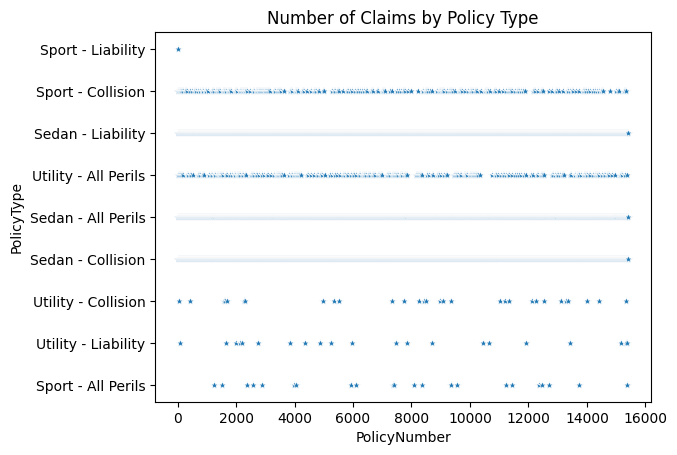

In [67]:
sns.scatterplot(data= claims, x= "PolicyNumber", y= "PolicyType",  marker= "*")
plt.title('Number of Claims by Policy Type')

Text(0.5, 1.0, 'Number of Claims by Vehicle Category')

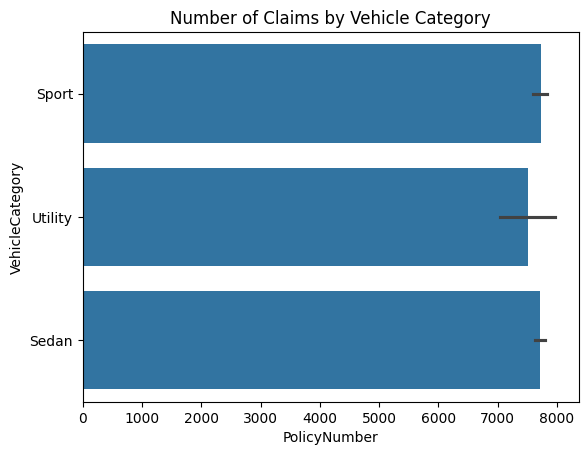

In [68]:
sns.barplot(data= claims, x= "PolicyNumber", y= "VehicleCategory")
plt.title('Number of Claims by Vehicle Category')

In [69]:
vc =  claims.groupby(['VehicleCategory', 'FraudFound'], as_index = False).agg(FraudCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Count of Fraud by Vehicle Category')

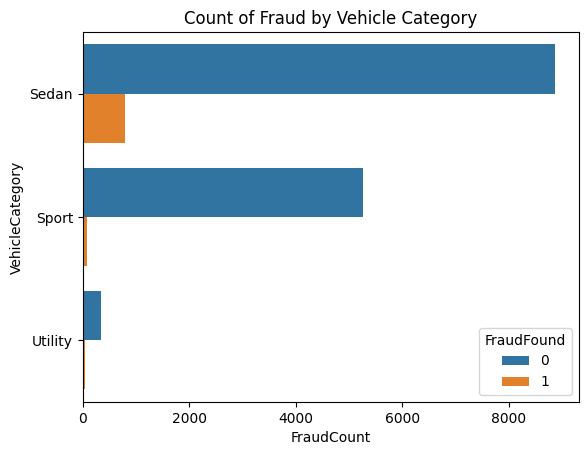

In [70]:
sns.barplot(data= vc, y= "VehicleCategory", x= "FraudCount", hue = "FraudFound")
plt.title('Count of Fraud by Vehicle Category')

In [71]:
dr =  claims.groupby(['DriverRating', 'FraudFound'], as_index = False).agg(FraudCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Count of Fraud by Driver Rating')

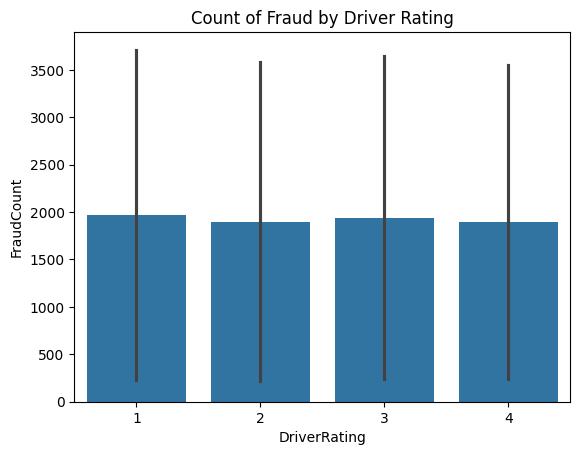

In [72]:
sns.barplot(data= dr, y= "FraudCount", x= "DriverRating")
plt.title('Count of Fraud by Driver Rating')

Text(0.5, 1.0, 'Number of claims by year ')

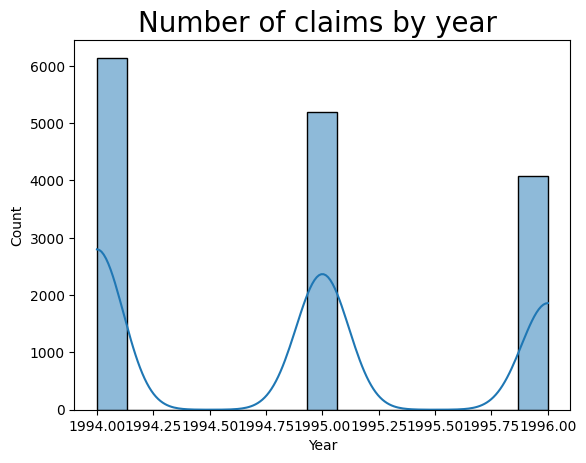

In [73]:
sns.histplot(claims["Year"],kde=True)
plt.title("Number of claims by year ", size=20)

Text(0.5, 1.0, 'Number of claims by Vehicle Age and Fraud Found')

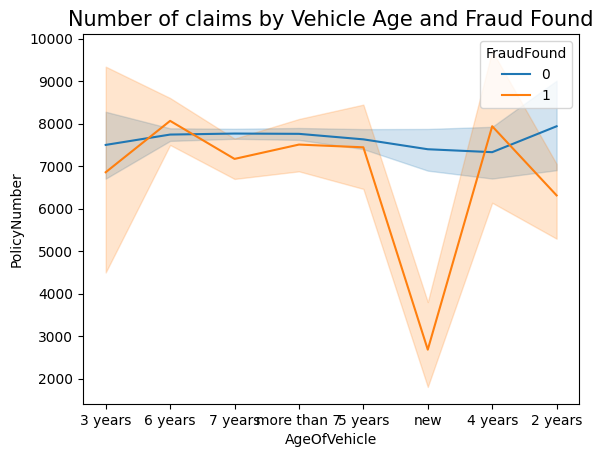

In [74]:
sns.lineplot(data=claims, x= claims['AgeOfVehicle'], y= claims['PolicyNumber'], hue= claims['FraudFound'])
plt.title("Number of claims by Vehicle Age and Fraud Found", size=15)

Text(0.5, 1.0, 'Number of Cars claimed by Vehicle Age and Report Filed')

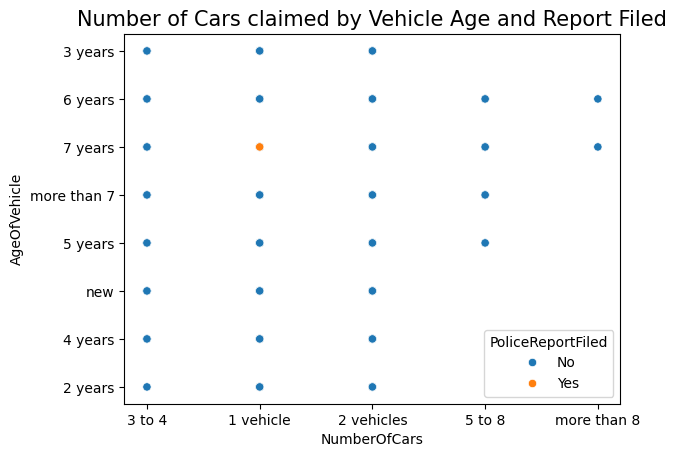

In [75]:
sns.scatterplot(data=claims, x=claims['NumberOfCars'], y= claims['AgeOfVehicle'], hue=claims['PoliceReportFiled'])
plt.title("Number of Cars claimed by Vehicle Age and Report Filed", size=15)

Text(0.5, 1.0, 'Number of Cars Claimed by Vehicle Age and Fraud Found')

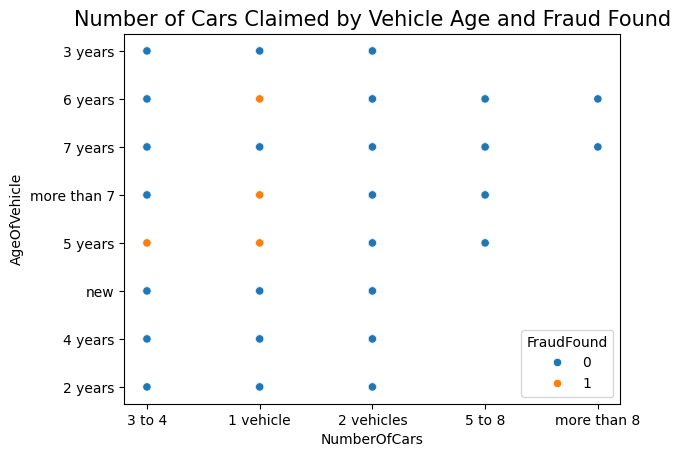

In [76]:
sns.scatterplot(data=claims, x=claims['NumberOfCars'], y= claims['AgeOfVehicle'], hue=claims['FraudFound'])
plt.title("Number of Cars Claimed by Vehicle Age and Fraud Found", size=15)

In [77]:
ac =  claims.groupby(['Year', 'AgentType'], as_index = False).agg(PolicyCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Number of Claimed by Year and Agent Type')

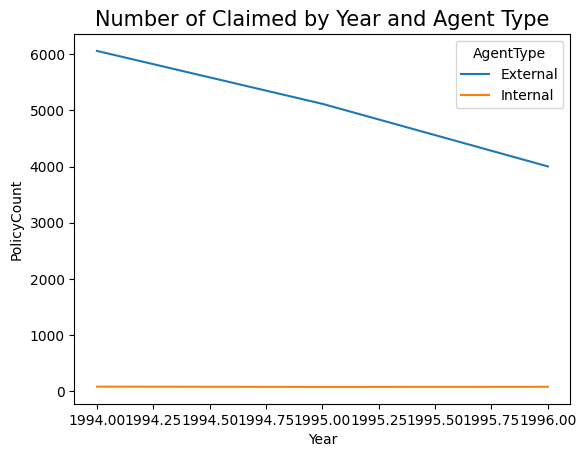

In [78]:
sns.lineplot(data=ac, x= 'Year', y= 'PolicyCount', hue= 'AgentType')
plt.title("Number of Claimed by Year and Agent Type", size=15)

In [79]:
fc =  claims.groupby(['Year', 'FraudFound'], as_index = False).agg(PolicyCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Number of Claimed by Year and Fraud Found')

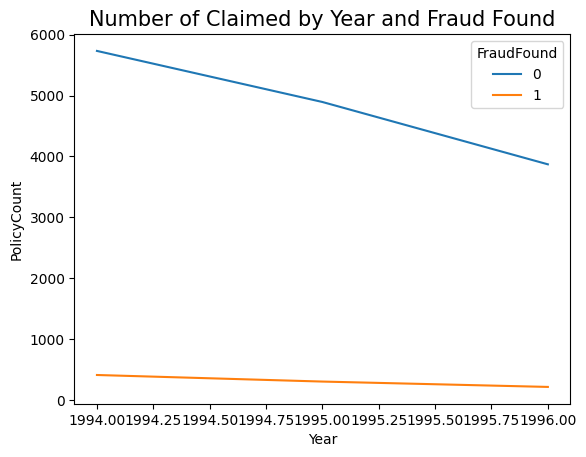

In [80]:
sns.lineplot(data=fc, x= 'Year', y= 'PolicyCount', hue= 'FraudFound')
plt.title("Number of Claimed by Year and Fraud Found", size=15)

In [81]:
ffc =  claims.groupby(['AgentType', 'FraudFound'], as_index = False).agg(PolicyCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Number of Fraud claims by Agent type')

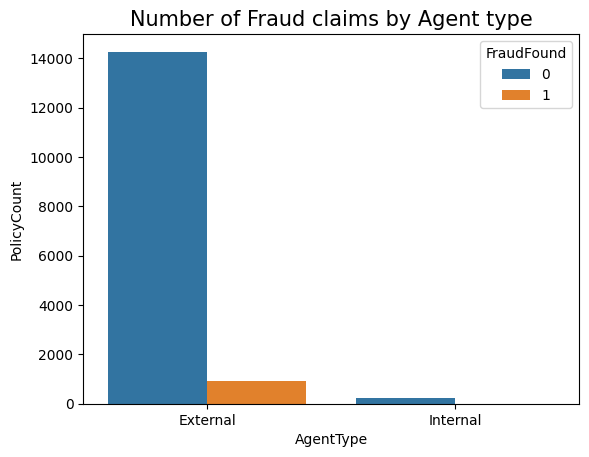

In [82]:
sns.barplot(data=ffc, x= 'AgentType', y= 'PolicyCount', hue= 'FraudFound')
plt.title("Number of Fraud claims by Agent type", size=15)

In [83]:
dwc =  claims.groupby(['DayOfWeekClaimed', 'FraudFound'], as_index = False).agg(PolicyCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Number of Claims by Day of week claimed and Fraud Found')

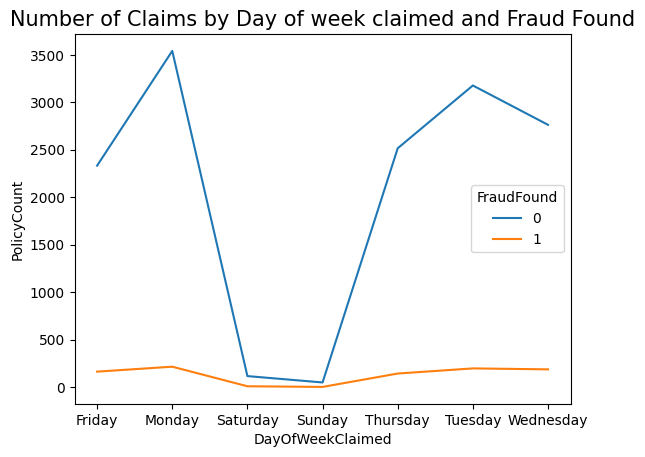

In [84]:
sns.lineplot(data=dwc, x= 'DayOfWeekClaimed', y= 'PolicyCount', hue= 'FraudFound')
plt.title("Number of Claims by Day of week claimed and Fraud Found", size=15)

In [85]:
wmc =  claims.groupby(['WeekOfMonthClaimed', 'FraudFound'], as_index = False).agg(PolicyCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Number of Claims by Week of month claimed and Fraud Found')

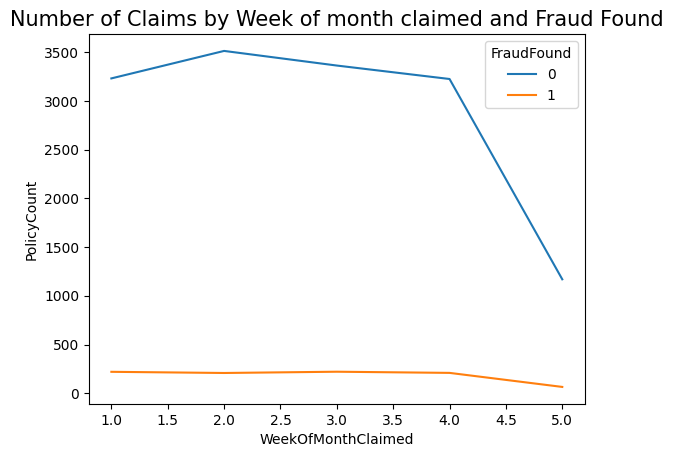

In [86]:
sns.lineplot(data=wmc, x= 'WeekOfMonthClaimed', y= 'PolicyCount', hue= 'FraudFound')
plt.title("Number of Claims by Week of month claimed and Fraud Found", size=15)

In [87]:
vp =  claims.groupby(['VehiclePrice', 'FraudFound'], as_index = False).agg(PolicyCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Number of Claims claimed by Vehicle Price and Fraud Found')

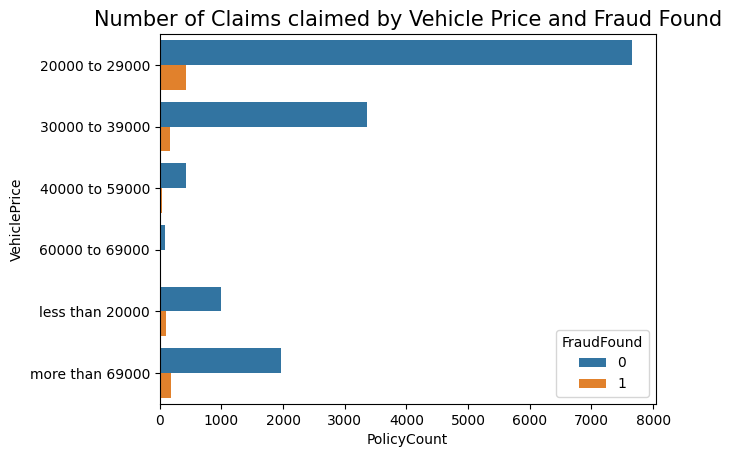

In [88]:
sns.barplot(data=vp, y= 'VehiclePrice', x= 'PolicyCount', hue= 'FraudFound')
plt.title("Number of Claims claimed by Vehicle Price and Fraud Found", size=15)

In [89]:
vpc =  claims.groupby(['VehiclePrice', 'VehicleCategory'], as_index = False).agg(PolicyCount = ('PolicyNumber', 'count'))

Text(0.5, 1.0, 'Number of Claims by Vehicle Price and Category')

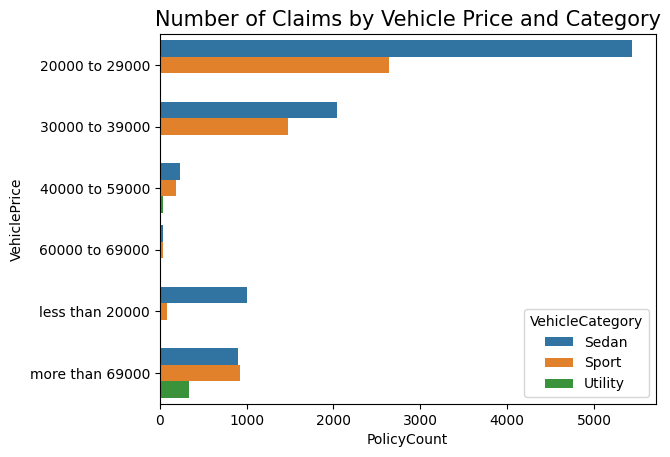

In [90]:
sns.barplot(data=vpc, y= 'VehiclePrice', x= 'PolicyCount', hue= 'VehicleCategory')
plt.title("Number of Claims by Vehicle Price and Category", size=15)

Patterns noticed:

1. Most of the fraud claims lack police report, no previous claims and witness.
2. Most of the fraud claims are made by men.
3. Most of the fraud claims are made by people who had no address change claim.
4. Sedan- All perils have more fraud claims.
5. Most of the fraud claims are made by the policy holders who had external agents.
6. Most fraud claims are made by policy holders who have external agent with no police report filed on the accident and no witness found.
